# Car Insurance Claim Prediction
Predict whether the policyholder will file a claim in the next 6 months or not.
# Dataset


In [10]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import seaborn

In [11]:
import statsmodels.api as sm
import plotly.express as px
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
warnings.filterwarnings('ignore')

In [12]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [13]:
df = pd.read_csv('./data/sample_submission.csv')
# df.head()
# print(df)
len(df),sum(test_df['policy_id']==df['policy_id'])

(39063, 39063)

In [14]:
df.head(),df.shape

(  policy_id  is_claim
 0   ID58593         1
 1   ID58594         1
 2   ID58595         1
 3   ID58596         1
 4   ID58597         1,
 (39063, 2))

In [15]:
# train_df.head()
# test_df.head()
[train_df.shape,test_df.shape]

[(58592, 44), (39063, 43)]

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [8]:
train_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
policy_id,ID00001,ID00002,ID00003,ID00004,ID00005,ID00006,ID00007,ID00008,ID00009,ID00010
policy_tenure,0.515874,0.672619,0.84111,0.900277,0.596403,1.018709,0.097992,0.509085,0.282394,0.566255
age_of_car,0.05,0.02,0.02,0.11,0.11,0.07,0.16,0.14,0.07,0.04
age_of_policyholder,0.644231,0.375,0.384615,0.432692,0.634615,0.519231,0.403846,0.423077,0.298077,0.442308
area_cluster,C1,C2,C3,C4,C5,C6,C7,C8,C7,C9
population_density,4990,27003,4076,21622,34738,13051,6112,8794,6112,17804
make,1,1,1,1,2,3,4,1,3,1
segment,A,A,A,C1,A,C2,B2,B2,C2,B2
model,M1,M1,M1,M2,M3,M4,M5,M6,M4,M7
fuel_type,CNG,CNG,CNG,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Petrol


In [ ]:
# Problematic columns:
# max_torque :  60Nm@3500rpm	60Nm@3500rpm	60Nm@3500rpm	113Nm@4400rpm	91Nm@4250rpm	250Nm@2750rpm
# max_power  : 40.36bhp@6000rpm	40.36bhp@6000rpm	40.36bhp@6000rpm	88.50bhp@6000rpm	67.06bhp@5500rpm	
# engine_type: F8D Petrol Engine	F8D Petrol Engine	F8D Petrol Engine	1.2 L K12N Dualjet	1.0 SCe	1.5 L U2 CRDi

In [12]:
maxTorque = train_df['max_torque']
print(len(set(maxTorque)))

9


In [13]:
maxPower = train_df['max_power']
print(len(set(maxPower)))

9


In [14]:
engineType = train_df['engine_type']
print(len(set(engineType)))

11


In [15]:
print(len(set(train_df['rear_brakes_type'])))

2


In [16]:
train_df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [55]:
print(train_df.shape)
for col in train_df.columns:
    print(col.rjust(32, ' '),'\t\t',str(train_df[col].dtypes).rjust(10, ' '), '\t', len(set(train_df[col])))

(58592, 44)
                       policy_id 		     object 	 58592
                   policy_tenure 		    float64 	 58592
                      age_of_car 		    float64 	 49
             age_of_policyholder 		    float64 	 75
                    area_cluster 		     object 	 22
              population_density 		      int64 	 22
                            make 		      int64 	 5
                         segment 		     object 	 6
                           model 		     object 	 11
                       fuel_type 		     object 	 3
                      max_torque 		     object 	 9
                       max_power 		     object 	 9
                     engine_type 		     object 	 11
                         airbags 		      int64 	 3
                          is_esc 		     object 	 2
          is_adjustable_steering 		     object 	 2
                         is_tpms 		     object 	 2
              is_parking_sensors 		     object 	 2
               is_parking_camera 		     object 	 2
     

In [26]:
# policy_id 58592
# policy_tenure 58592
# Make policy_id as index

In [17]:
test_df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000
mean,0.611304,0.069635,0.469087,18816.232496,1.763382,3.139672,1160.605842,3.620613,5.245782,4.853222,3849.328981,1671.774979,1553.033203,1384.501677,1.759235
std,0.415005,0.056854,0.122072,17651.942351,1.134112,1.831043,266.942754,0.485241,0.430556,0.228060,312.181174,111.973404,79.030425,212.724627,1.386689
min,0.002745,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,0.208958,0.020000,0.375000,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,0.574078,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000
75%,1.040936,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000
max,1.391398,1.000000,0.990385,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000


# Data Inspection


In [9]:
# This shows the data set is heavily imbalanced
sum(train_df['is_claim'])/len(train_df)

0.06396777717094485

In [23]:
# sum(df['is_claim'])/df.shape[0]
# df.shape   # (39063, 2)
# df.info()
sum(train_df['is_claim'])
sum(train_df['is_claim'])/39063

0.09594757187108005

Only 6 % of all records have a value 'is_claim' equal 1, which means that the policyholder filed a claim.

In [56]:
# Inspect numerical features
numerical = train_df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Numerical Features in DataSet: 16
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


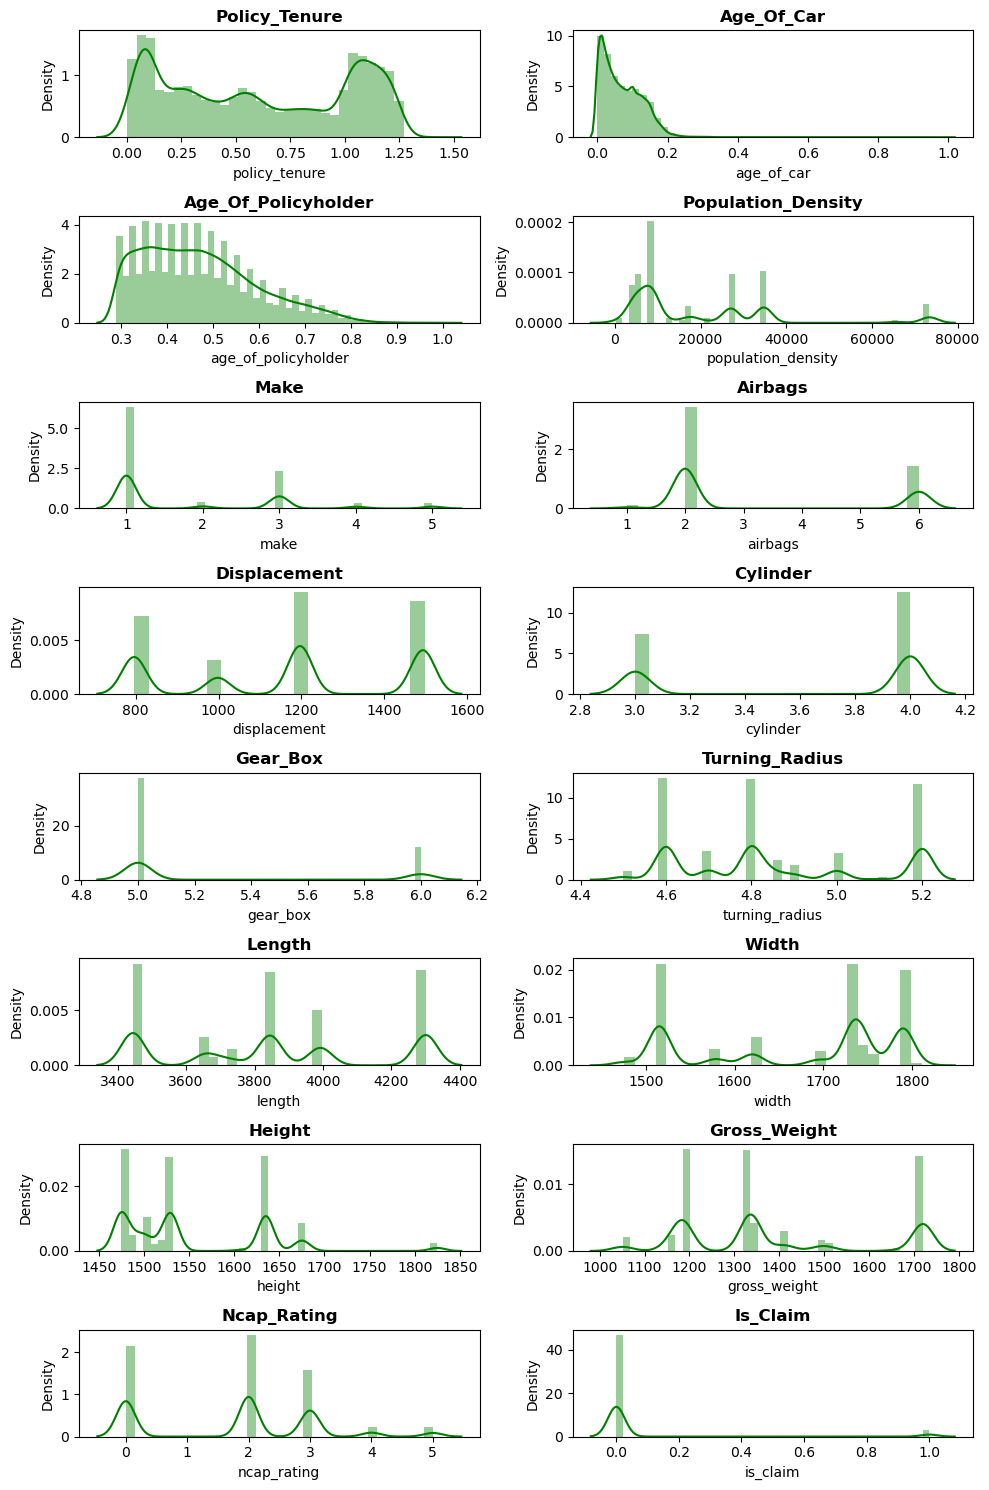

In [62]:
target = [i for i in numerical.columns]
plt.figure(figsize=(10,15))
for i,col in enumerate(numerical.columns):
    plot=plt.subplot(8,2,i+1)
    seaborn.distplot(train_df[col],color='green')
    plt.title(f'{col.title()}',weight='bold')
    plt.tight_layout()

In [87]:
# Inspect categorical features
categorical = train_df.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

Categorical Features in DataSet: 28
Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [88]:
categorical = categorical.drop('policy_id',axis=1)

In [92]:
categorical.shape

(58592, 27)

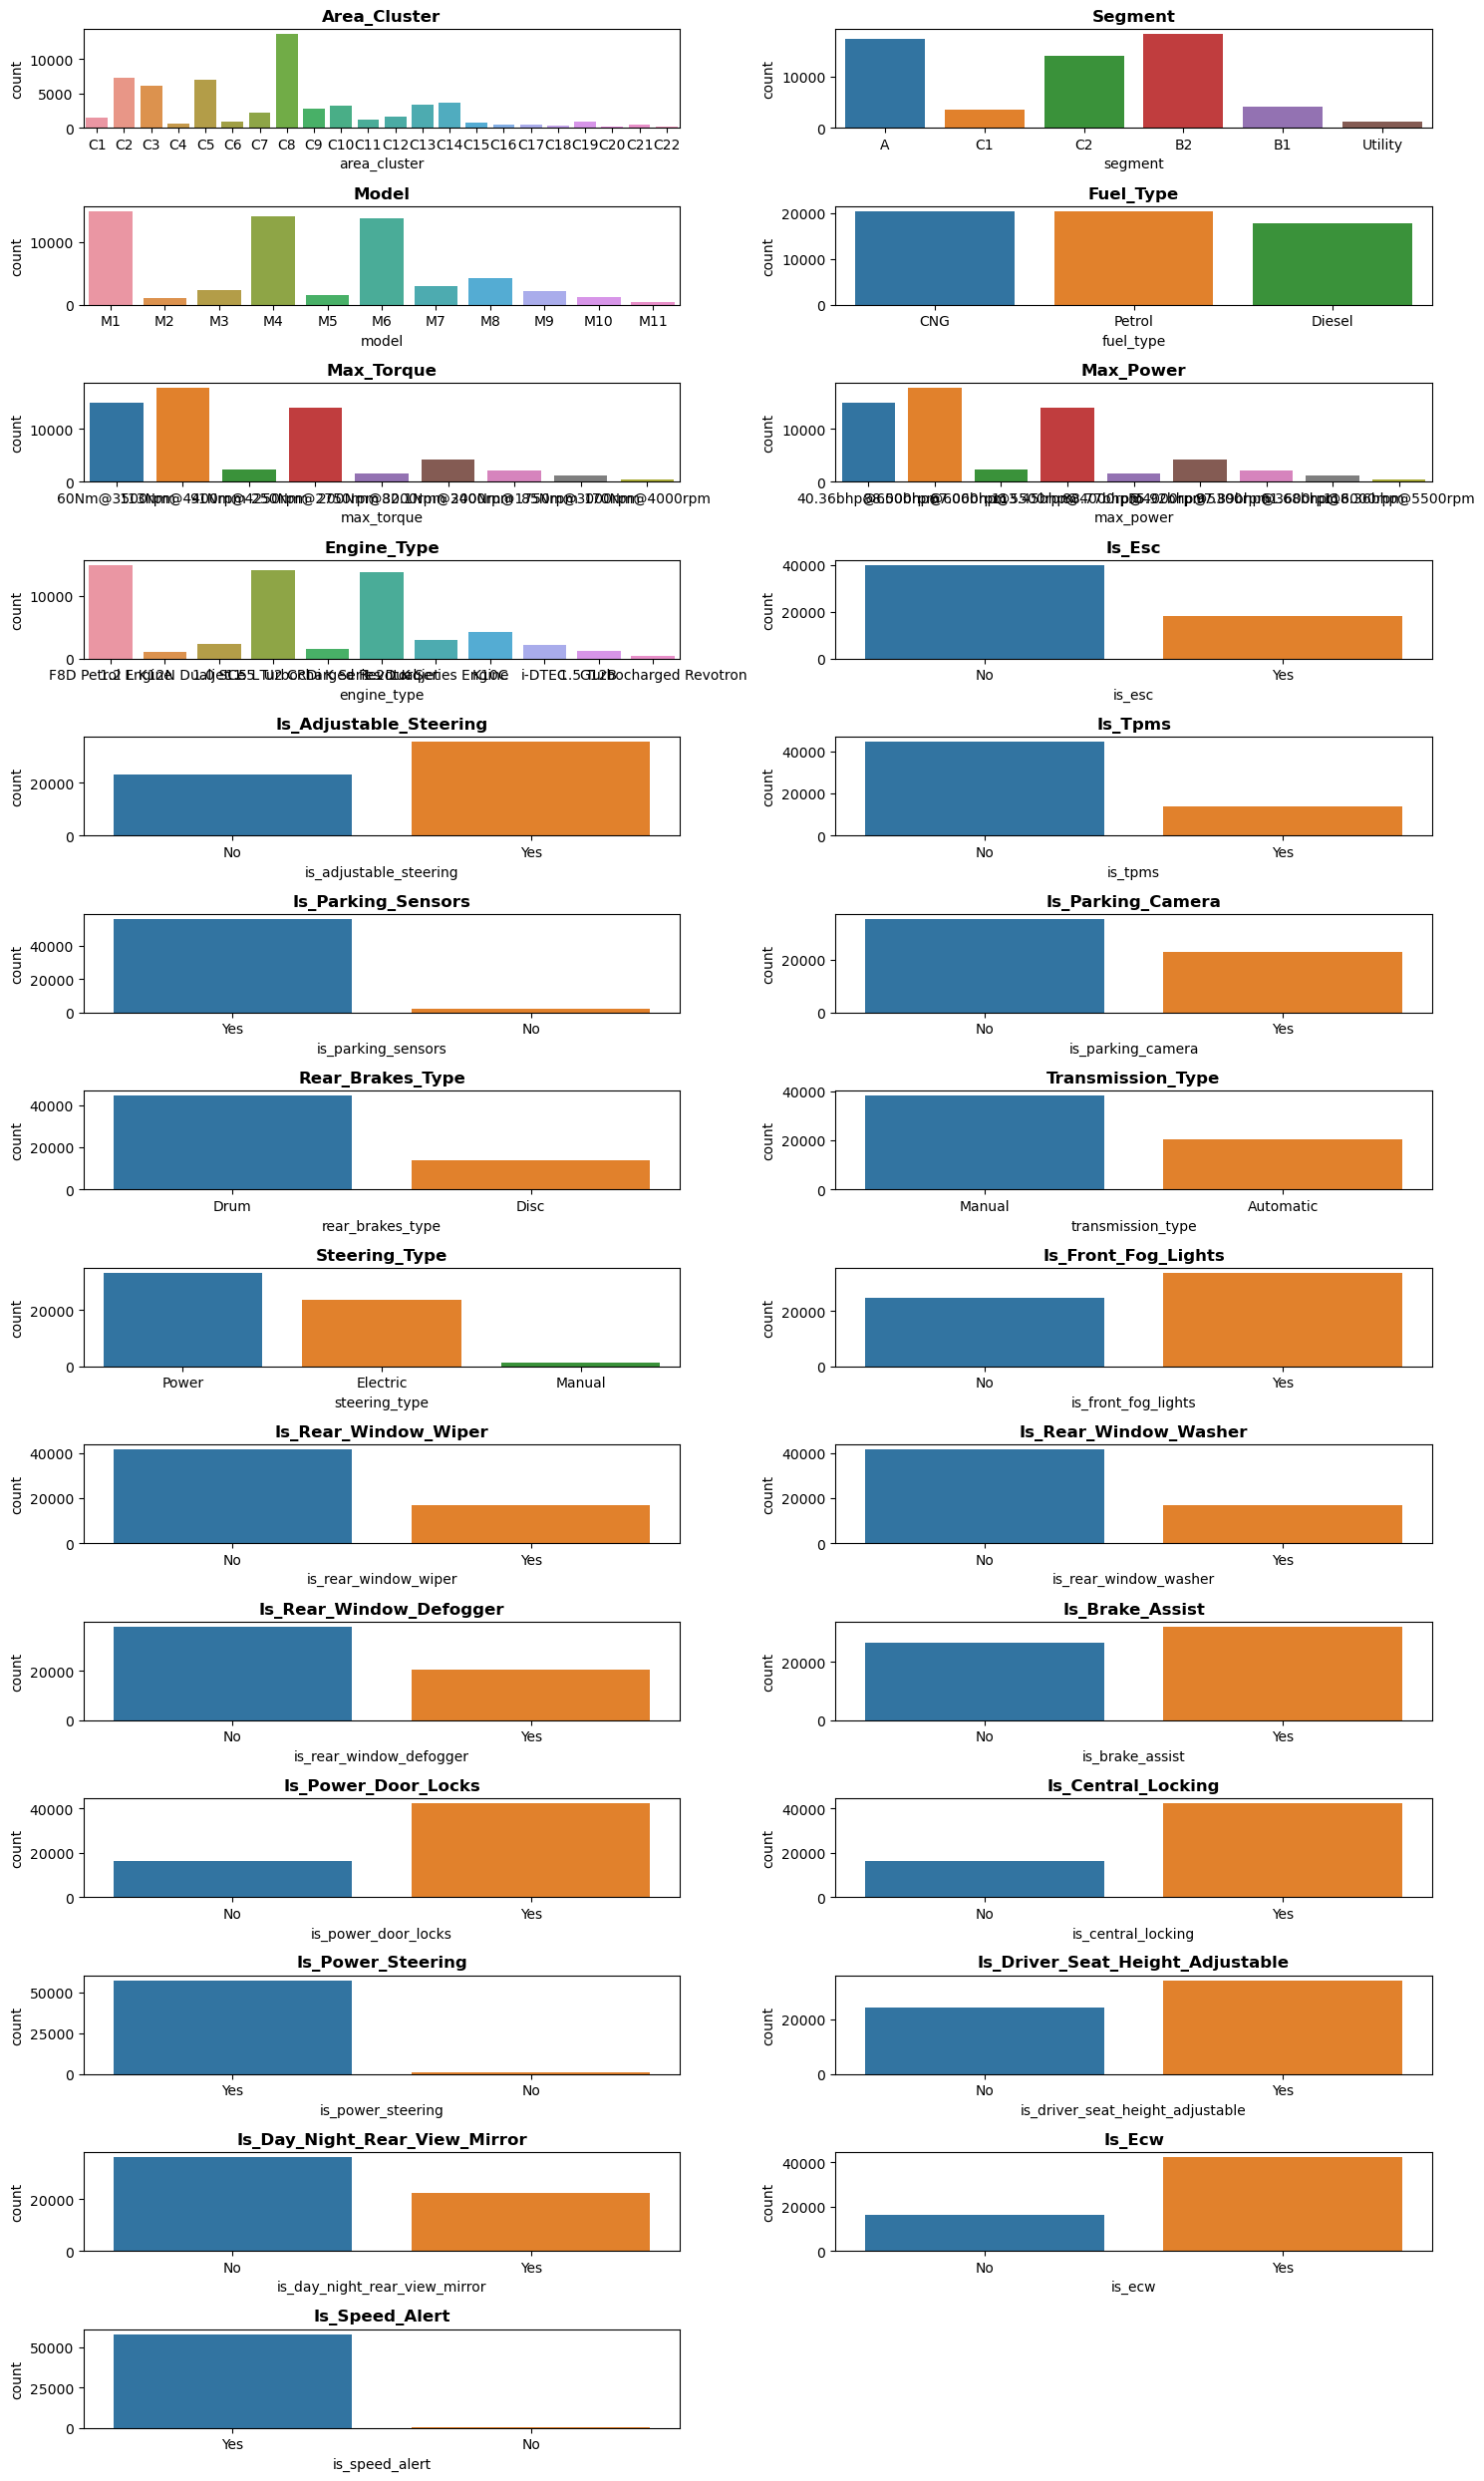

In [81]:
plt.figure(figsize=(15,25))
for i,col in enumerate(categorical.columns):
    plot=plt.subplot(14,2,i+1)
    seaborn.countplot(x=train_df[col])
    plt.title(f'{col.title()}',weight='bold')
    plt.tight_layout()

In [21]:
# Preparing training data - the target column 'is_claim'
X = train_df.drop('is_claim', axis = 1)
# Add constant to X
X = sm.tools.tools.add_constant(X)
y = train_df['is_claim']
[X.shape, y.shape]

[(58592, 44), (58592,)]

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(46873, 44), (11719, 44), (46873,), (11719,)]

In [23]:
# Create the pipeline for Logistic Regression
pipeline_lr = make_pipeline(OneHotEncoder(), StandardScaler(), LogisticRegression())
# pipeline_lr = make_pipeline(OneHotEncoder(), LogisticRegression())

In [103]:
# Create the pipeline for Random Forest
pipeline_rf = make_pipeline(OneHotEncoder(), RandomForestClassifier(random_state=42))

In [25]:
# Fit the pipeline for Logistic Regression on the training data and get the test score
pipeline_lr.fit(X_train, y_train)
# test_score = pipeline_lr.score(X_test, y_test)
# test_score

In [100]:
y_pred = pipeline_lr.predict(X_test)

In [19]:
score = accuracy_score(y_test, y_pred)
score

0.9354040447137127

In [ ]:
# Fit the pipeline for Random Forest on the training data and get the test score
pipeline_rf.fit(X_train, y_train)

In [24]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.5

In [28]:
# Create the pipeline for Logistic Regression
# pipeline_lr_withStandardScaler = make_pipeline(OneHotEncoder(), StandardScaler(), LogisticRegression())

In [ ]:
pipeline_lr_withStandardScaler.fit(X_train, y_train)

In [1]:
dRF = RandomForestClassifier( random_state=42,
                              max_depth=10,
                              min_samples_leaf=10,
                              min_samples_split=10,
                             )

# Train Model
dRF.fit(X_train,y_train)

# Training set performance
train_accuracy= dRF.score(X_train,y_train)

#Testing set performance
test_accuracy=dRF.score(X_test,y_test)


print('Accuracy for Training set is')
print(train_accuracy)
print('----------------------------------')
print('Accuracy for Testing set is')
print(test_accuracy)

In [ ]:
y_pred = dRF.predict(X_test)